# Cytosol Only Cellpose Segmentation Sharded

In [1]:
import os

import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scportrait.pipeline.featurization import CellFeaturizer
from scportrait.pipeline.extraction import HDF5CellExtraction
from scportrait.pipeline.project import Project
from scportrait.pipeline.segmentation.workflows import ShardedCytosolOnlySegmentationCellpose
from scportrait.pipeline.selection import LMDSelection

/Users/sophia/mambaforge/envs/test/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
project_location = "project_cytosol_only_sharded"

project = Project(
    os.path.abspath(project_location),
    config_path="config_example1.yml",
    overwrite=True,
    debug=True,
    segmentation_f=ShardedCytosolOnlySegmentationCellpose,
    extraction_f=HDF5CellExtraction,
    featurization_f=CellFeaturizer,
    selection_f=LMDSelection,
)

Updating project config file.
[10/02/2025 10:59:33] Loading config from /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only_sharded/config.yml
[10/02/2025 10:59:33] Compression algorithm: lzf
[10/02/2025 10:59:33] No cache directory specified in config using current working directory /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1.


In [3]:
from scportrait.data._datasets import dataset_1

dataset_1_path = dataset_1()

# these example images are downloaded from the human protein atlas (www.proteinatlas.org)
images = [f"{dataset_1_path}/Ch1.tif", f"{dataset_1_path}/Ch2.tif", f"{dataset_1_path }/Ch3.tif"]

project.load_input_from_tif_files(images)

[10/02/2025 10:59:33] Output location /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only_sharded/scportrait.sdata already exists. Overwriting.
INFO     The Zarr backing store has been changed from None the new file path:                                      
         /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_on
         ly_sharded/scportrait.sdata                                                                               
[10/02/2025 10:59:33] Initialized temporary directory at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/Project_ler6_aav for Project
[10/02/2025 10:59:34] Image input_image written to sdata object.
[10/02/2025 10:59:34] Cleaned up temporary directory at <TemporaryDirectory '/Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/Project_ler6_aav'>


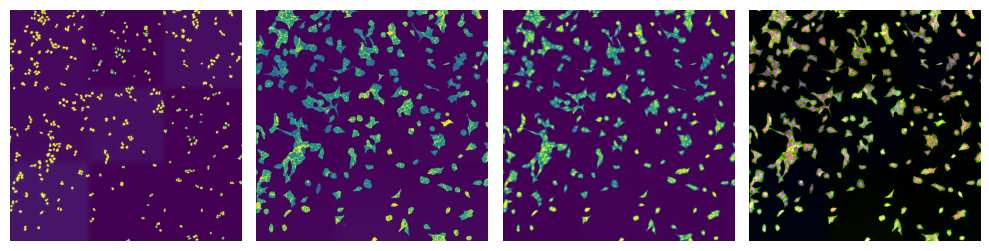

In [4]:
# visualize input images as example
# it is not recommended to execute this block with large input images as it will compute for some time

def colorize(im, color, clip_percentile=0.0):
    """
    Helper function to create an RGB image from a single-channel image using a
    specific color.
    """
    # Check that we do just have a 2D image
    if im.ndim > 2 and im.shape[2] != 1:
        raise ValueError("This function expects a single-channel image!")

    # Rescale the image according to how we want to display it
    im_scaled = im.astype(np.float32) - np.percentile(im, clip_percentile)
    im_scaled = im_scaled / np.percentile(im_scaled, 100 - clip_percentile)
    im_scaled = np.clip(im_scaled, 0, 1)

    # Need to make sure we have a channels dimension for the multiplication to work
    im_scaled = np.atleast_3d(im_scaled)

    # Reshape the color (here, we assume channels last)
    color = np.asarray(color).reshape((1, 1, -1))
    return im_scaled * color


def generate_composite(images, colors=None, plot=False):
    if colors is None:
        colors = [(0, 0, 1), (0, 1, 0), (1, 0, 0), (1, 0, 1)]
    colorized = []
    for image, color in zip(images, colors, strict=False):
        image = colorize(image, color, 0.0)
        colorized.append(image)

    if plot:
        for i in colorized:
            plt.figure()
            plt.imshow(i)

    image = colorized[0]
    for i in range(len(colorized) - 1):
        image += colorized[i + 1]

    return np.clip(image, 0, 1)


fig, axs = plt.subplots(1, 4, figsize=(10, 4))
axs[0].imshow(project.input_image[0])
axs[0].axis("off")

axs[1].imshow(project.input_image[1])
axs[1].axis("off")

axs[2].imshow(project.input_image[2])
axs[2].axis("off")

img = generate_composite(project.input_image)

axs[3].imshow(img)
axs[3].axis("off")

fig.tight_layout()

In [5]:
project.segment()

[10/02/2025 10:59:37] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./ShardedCytosolOnlySegmentationCellpose_6ztm_ofs for ShardedCytosolOnlySegmentationCellpose
[10/02/2025 10:59:37] Mapped input image to memory-mapped array.
[10/02/2025 10:59:37] Created new shard directory /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only_sharded/segmentation/tiles
[10/02/2025 10:59:37] target size 2000000 is smaller than input image 9229443. Sharding will be used.
[10/02/2025 10:59:37] input image 3039 px by 3037 px
[10/02/2025 10:59:37] target_shard_size: 2000000
[10/02/2025 10:59:37] sharding plan:
[10/02/2025 10:59:37] 2 rows by 2 columns
[10/02/2025 10:59:37] 1519 px by 1518 px
[10/02/2025 10:59:37] Saving Sharding plan to file: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only_sharded/segmentation/sharding_plan.csv
[10/02/2025 10:59:37] Init

Segmenting Image Tiles:   0%|          | 0/4 [00:00<?, ?it/s]

[10/02/2025 10:59:42] Beginning Segmentation of Shard with the slicing (slice(0, 1619, None), slice(0, 1618, None))
[10/02/2025 10:59:42] Beginning Segmentation of Shard with the slicing (slice(0, 1619, None), slice(1418, 3037, None))
[10/02/2025 10:59:42] Time taken to load input image: 0.005835042102262378
[10/02/2025 10:59:42] Time taken to load input image: 0.00899929110892117
[10/02/2025 10:59:42] GPU Status for segmentation is True and will segment using the following device mps.
[10/02/2025 10:59:42] GPU Status for segmentation is True with 1 GPUs found. Segmentation will be performed on the device mps with 2 processes per device in parallel.
[10/02/2025 10:59:42] GPU Status for segmentation is True and will segment using the following device mps.
[10/02/2025 10:59:42] GPU Status for segmentation is True with 1 GPUs found. Segmentation will be performed on the device mps with 2 processes per device in parallel.
[10/02/2025 10:59:42] Segmenting cytosol using the following model: 

/Users/sophia/mambaforge/envs/test/lib/python3.10/site-packages/cellpose/dynamics.py:189: RuntimeWarning: invalid value encountered in divide
  mu /= (1e-60 + (mu**2).sum(axis=0)**0.5)
/Users/sophia/mambaforge/envs/test/lib/python3.10/site-packages/cellpose/dynamics.py:189: RuntimeWarning: invalid value encountered in divide
  mu /= (1e-60 + (mu**2).sum(axis=0)**0.5)


[10/02/2025 10:59:50] Filtering status for this segmentation is set to True.
[10/02/2025 10:59:50] Filtering has been performed during segmentation. Nucleus and Cytosol IDs match. No additional steps are required.
[10/02/2025 10:59:50] Saved cell_id classes to file /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only_sharded/segmentation/tiles/0/classes.csv.
[10/02/2025 10:59:50] === Finished segmentation of shard ===
[10/02/2025 10:59:50] Filtering status for this segmentation is set to True.
[10/02/2025 10:59:50] Filtering has been performed during segmentation. Nucleus and Cytosol IDs match. No additional steps are required.
[10/02/2025 10:59:50] Saved cell_id classes to file /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only_sharded/segmentation/tiles/1/classes.csv.
[10/02/2025 10:59:50] === Finished segmentation of shard ===
[10/02/2025 10:59:50] Cleaned up temporary d

Segmenting Image Tiles:  25%|██▌       | 1/4 [00:12<00:37, 12.55s/it]

[10/02/2025 10:59:50] Segmentation of Shard with the slicing (slice(0, 1619, None), slice(0, 1618, None)) finished
[10/02/2025 10:59:50] Beginning Segmentation of Shard with the slicing (slice(1419, 3039, None), slice(0, 1618, None))
[10/02/2025 10:59:50] Segmentation of Shard with the slicing (slice(0, 1619, None), slice(1418, 3037, None)) finished
[10/02/2025 10:59:50] Beginning Segmentation of Shard with the slicing (slice(1419, 3039, None), slice(1418, 3037, None))
[10/02/2025 10:59:50] Time taken to load input image: 0.010988792171701789
[10/02/2025 10:59:50] Time taken to load input image: 0.009258500067517161
[10/02/2025 10:59:50] GPU Status for segmentation is True and will segment using the following device mps.
[10/02/2025 10:59:50] GPU Status for segmentation is True with 1 GPUs found. Segmentation will be performed on the device mps with 2 processes per device in parallel.
[10/02/2025 10:59:50] GPU Status for segmentation is True and will segment using the following device 

/Users/sophia/mambaforge/envs/test/lib/python3.10/site-packages/cellpose/dynamics.py:189: RuntimeWarning: invalid value encountered in divide
  mu /= (1e-60 + (mu**2).sum(axis=0)**0.5)
/Users/sophia/mambaforge/envs/test/lib/python3.10/site-packages/cellpose/dynamics.py:189: RuntimeWarning: invalid value encountered in divide
  mu /= (1e-60 + (mu**2).sum(axis=0)**0.5)


[10/02/2025 10:59:55] Filtering status for this segmentation is set to True.
[10/02/2025 10:59:55] Filtering has been performed during segmentation. Nucleus and Cytosol IDs match. No additional steps are required.
[10/02/2025 10:59:55] Saved cell_id classes to file /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only_sharded/segmentation/tiles/3/classes.csv.
[10/02/2025 10:59:55] === Finished segmentation of shard ===
[10/02/2025 10:59:55] Filtering status for this segmentation is set to True.
[10/02/2025 10:59:55] Filtering has been performed during segmentation. Nucleus and Cytosol IDs match. No additional steps are required.
[10/02/2025 10:59:55] Saved cell_id classes to file /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only_sharded/segmentation/tiles/2/classes.csv.
[10/02/2025 10:59:55] === Finished segmentation of shard ===
[10/02/2025 10:59:55] Cleaned up temporary d

Segmenting Image Tiles: 100%|██████████| 4/4 [00:18<00:00,  4.53s/it]

[10/02/2025 10:59:56] Segmentation of Shard with the slicing (slice(1419, 3039, None), slice(0, 1618, None)) finished


[10/02/2025 10:59:56] Finished parallel segmentation
[10/02/2025 10:59:56] resolve sharding plan
[10/02/2025 10:59:56] Cleared temporary directory containing input image used for sharding.
[10/02/2025 10:59:56] Stitching tile 0
[10/02/2025 10:59:57] Time taken to cleanup overlapping shard regions for shard 0: 0.2450709342956543s
[10/02/2025 10:59:57] Number of classes contained in shard after processing: 168
[10/02/2025 10:59:57] Number of Ids in filtered_classes after adding shard 0: 168
[10/02/2025 10:59:57] Finished stitching tile 0 in 1.0227599143981934 seconds.
[10/02/2025 10:59:57] Number of filtered classes in Dataset: 168
[10/02/2025 10:59:57] Filtering status for this segmentation is set to True.
[10/02/2025 10:59:57] Filtering has been performed during segmentation. Nucleus and Cytosol IDs match. No additional steps are required.
[10/02/2025 10:59:57] Saved cell_id classes to file /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_

(-0.5, 3036.5, 3038.5, -0.5)

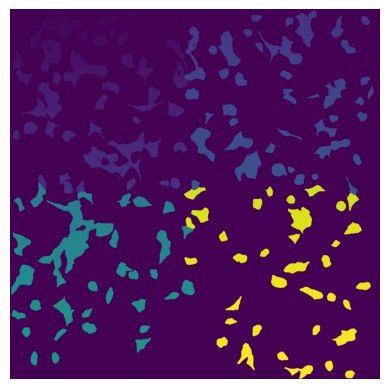

In [6]:
plt.figure()
plt.imshow(project.sdata["seg_all_cytosol"])
plt.axis("off")

[10/02/2025 10:59:59] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./HDF5CellExtraction_lx6wn712 for HDF5CellExtraction
[10/02/2025 10:59:59] Created new directory for extraction results: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only_sharded/extraction/data
[10/02/2025 10:59:59] Setup output folder at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only_sharded/extraction/data
[10/02/2025 10:59:59] Found 1 segmentation masks for the given key in the sdata object. Will be extracting single-cell images based on these masks: ['seg_all_cytosol']
[10/02/2025 10:59:59] Using seg_all_cytosol as the main segmentation mask to determine cell centers.
[10/02/2025 11:00:01] Points centers_cells written to sdata object.
[10/02/2025 11:00:01] Extraction Details:
[10/02/2025 11:00:01] --------------------------------
[10/02/2025 11:00:01] Number

Extracting cell batches: 100%|██████████| 5/5 [00:00<00:00, 26.21it/s]


[10/02/2025 11:00:01] Finished extraction in 0.26 seconds (1714.89 cells / second)
[10/02/2025 11:00:01] Transferring results to final HDF5 data container.
[10/02/2025 11:00:01] number of cells too close to image edges to extract: 9
[10/02/2025 11:00:01] A total of 9 cells were too close to the image border to be extracted. Their cell_ids were saved to file /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only_sharded/extraction/removed_classes.csv.


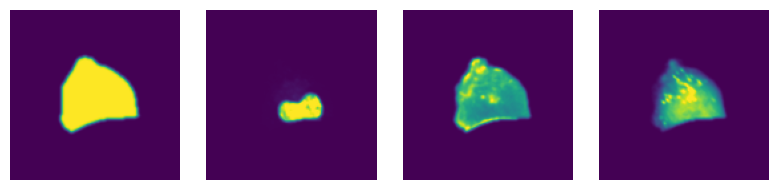

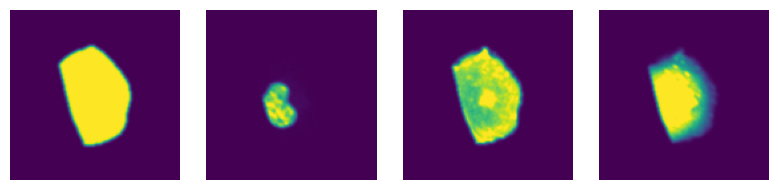

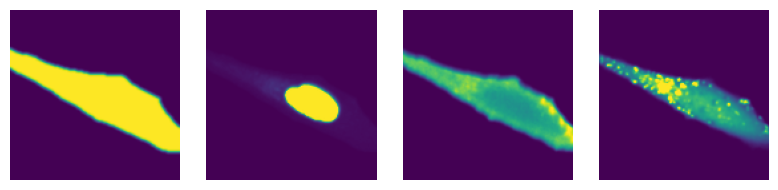

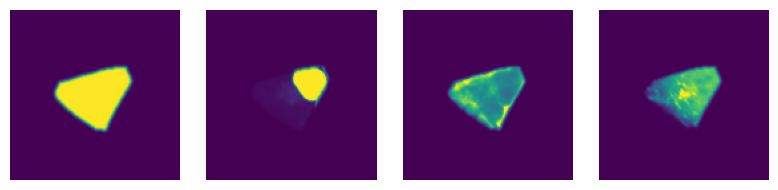

[10/02/2025 11:00:01] Transferring extracted single cells to .hdf5
[10/02/2025 11:00:01] single-cell index created.


Transferring single cell images to HDF5: 100%|██████████| 439/439 [00:00<00:00, 5448.68it/s]

[10/02/2025 11:00:01] single-cell data created
[10/02/2025 11:00:01] single-cell index labelled created.
[10/02/2025 11:00:01] channel information created.


[10/02/2025 11:00:02] Benchmarking times saved to file.
[10/02/2025 11:00:02] Cleaned up temporary directory at <TemporaryDirectory '/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./HDF5CellExtraction_lx6wn712'>


In [7]:
project.extract()

(439, 4, 128, 128)


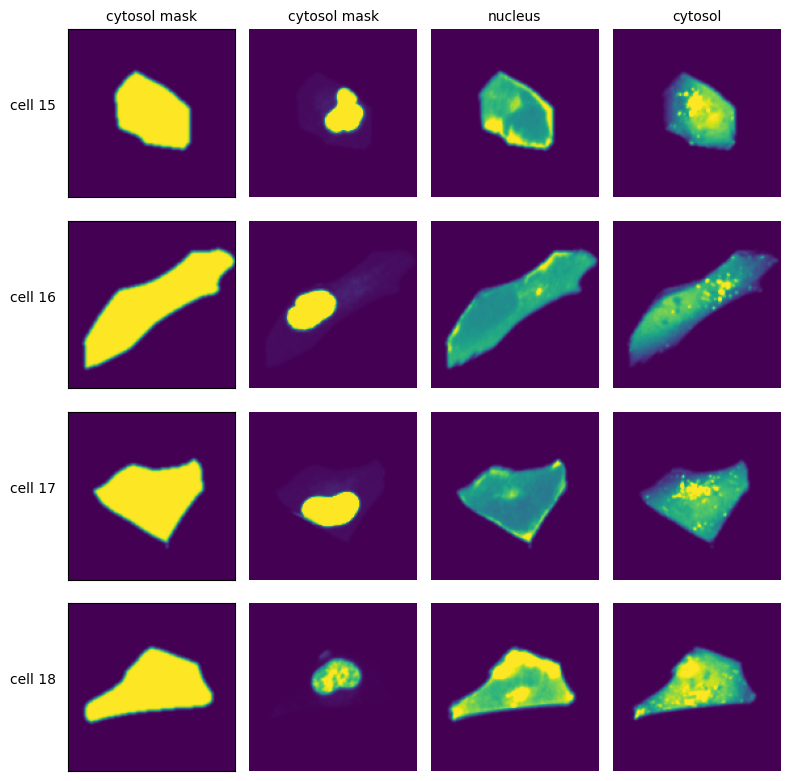

In [8]:
with h5py.File(f"{project_location}/extraction/data/single_cells.h5") as hf:
    index = hf.get("single_cell_index")
    images = hf.get("single_cell_data")

    print(images.shape)

    n_cells = [2, 3, 4, 5]
    fig, axs = plt.subplots(len(n_cells), 4, figsize=(4 * 2, len(n_cells) * 2))
    labels = ["cytosol mask", "cytosol mask", "nucleus", "cytosol", "additional channel"]

    for i, id in enumerate(n_cells):
        cell_id = index[id][1]
        image = images[id]

        for n, _img in enumerate(image):
            axs[i, n].imshow(_img)

            if n == 0:
                axs[i, n].set_ylabel(f"cell {cell_id}", fontsize=10, rotation=0, labelpad=25)
                axs[i, n].xaxis.set_visible(False)
                axs[i, n].tick_params(left=False, labelleft=False)
            else:
                axs[i, n].axis("off")

            if i == 0:
                axs[i, n].set_title(labels[n], fontsize=10)
    fig.tight_layout()

In [9]:
project.featurize()

Using extraction directory: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only_sharded/extraction/data/single_cells.h5
[10/02/2025 11:00:02] Initialized temporary directory at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/CellFeaturizer_6kps4kn9 for CellFeaturizer
[10/02/2025 11:00:02] Started CellFeaturization of all available channels.
[10/02/2025 11:00:02] Created new directory for featurization results: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only_sharded/featurization/complete_CellFeaturizer
[10/02/2025 11:00:02] CPU specified in config file but MPS available on system. Consider changing the device for the next run.
[10/02/2025 11:00:02] Reading data from path: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only_sharded/extraction/data/single_cells.h5
[10/02/2025 

In [10]:
# load classification results
results = pd.read_csv(f"{project_location}/featurization/complete_CellFeaturizer/calculated_image_features.csv")
results

,cytosol_area,1_mean_cytosol,1_median_cytosol,1_quant75_cytosol,1_quant25_cytosol,1_summed_intensity_cytosol,1_summed_intensity_area_normalized_cytosol,2_mean_cytosol,2_median_cytosol,2_quant75_cytosol,...,2_summed_intensity_cytosol,2_summed_intensity_area_normalized_cytosol,3_mean_cytosol,3_median_cytosol,3_quant75_cytosol,3_quant25_cytosol,3_summed_intensity_cytosol,3_summed_intensity_area_normalized_cytosol,label,cell_id
0,6971.0,0.074123,0.0,0.026508,0.0,1214.43900,0.174213,0.220027,0.0,6.181641e-01,...,3604.9165,0.517131,0.111027,0.0,1.301269e-01,0.0,1819.0638,0.260947,0,11
1,3870.0,0.055529,0.0,0.000000,0.0,909.77954,0.235085,0.104923,0.0,0.000000e+00,...,1719.0621,0.444202,0.095618,0.0,0.000000e+00,0.0,1566.6045,0.404807,0,13
2,3324.0,0.045754,0.0,0.000000,0.0,749.64100,0.225524,0.099409,0.0,0.000000e+00,...,1628.7169,0.489987,0.088939,0.0,0.000000e+00,0.0,1457.1699,0.438378,0,15
3,5520.0,0.058031,0.0,0.009991,0.0,950.77344,0.172242,0.137709,0.0,1.029053e-01,...,2256.2280,0.408737,0.109622,0.0,1.606750e-02,0.0,1796.0485,0.325371,0,16
4,4273.0,0.059866,0.0,0.000001,0.0,980.83820,0.229543,0.097775,0.0,1.311302e-06,...,1601.9498,0.374901,0.102191,0.0,5.960465e-07,0.0,1674.3026,0.391833,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,6132.0,0.055158,0.0,0.002701,0.0,903.71155,0.147376,0.185291,0.0,4.995117e-01,...,3035.8018,0.495075,0.136409,0.0,6.314087e-02,0.0,2234.9190,0.364468,0,1277
435,4216.0,0.034656,0.0,0.000000,0.0,567.79846,0.134677,0.142166,0.0,2.980232e-07,...,2329.2505,0.552479,0.090592,0.0,5.960465e-08,0.0,1484.2596,0.352054,0,1278
436,5577.0,0.037257,0.0,0.001708,0.0,610.42030,0.109453,0.203732,0.0,2.258911e-01,...,3337.9420,0.598519,0.124443,0.0,1.167488e-02,0.0,2038.8794,0.365587,0,1279
437,5600.0,0.051918,0.0,0.002636,0.0,850.62170,0.151897,0.177957,0.0,3.471069e-01,...,2915.6426,0.520650,0.131117,0.0,4.772949e-02,0.0,2148.2280,0.383612,0,1280


In [11]:
#test selection workflow
selected_cells_large = results[results.cytosol_area > 4500]["cell_id"].tolist()
selected_cells_small = results[results.cytosol_area < 3000]["cell_id"].tolist()

cells_to_select = [
    {"name": "large_cells", "classes": selected_cells_large, "well": "A1"},
    {"name": "small_cells", "classes": selected_cells_small, "well": "B1"},
]

marker_0 = (0, 0)
marker_1 = (2000, 0)
marker_2 = (0, 2000)

calibration_marker = np.array([marker_0, marker_1, marker_2])

[10/02/2025 11:00:36] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./LMDSelection_x859l0ch for LMDSelection
[10/02/2025 11:00:36] Selection process started.


Processing cell batches: 100%|██████████| 3/3 [00:06<00:00,  2.18s/it]


[10/02/2025 11:00:43] Temporary directory not found, skipping cleanup
[10/02/2025 11:00:43] Temporary directory not found, skipping cleanup
[10/02/2025 11:00:43] Temporary directory not found, skipping cleanup
[10/02/2025 11:00:44] Coordinate lookup index calculation took 7.7478569590020925 seconds.
No configuration for shape_erosion found, parameter will be set to 0
No configuration for binary_smoothing found, parameter will be set to 3
No configuration for convolution_smoothing found, parameter will be set to 15
No configuration for rdp_epsilon found, parameter will be set to 0.1
No configuration for xml_decimal_transform found, parameter will be set to 100
No configuration for distance_heuristic found, parameter will be set to 300
No configuration for join_intersecting found, parameter will be set to True
Path optimizer used for XML generation: hilbert
cell set 0 passed sanity check
cell set 1 passed sanity check
Loading coordinates from external source
Processing cell sets in paral

dilating shapes:   0%|          | 0/204 [00:00<?, ?it/s]

Convert label format into coordinate format
Conversion finished, performing sanity check.
Intersecting Shapes will be merged into a single shape.


dilating shapes: 100%|██████████| 204/204 [00:04<00:00, 42.69it/s]


0 shapes that were intersecting were found and merged.


calculating polygons:   0%|          | 0/36 [00:00<?, ?it/s]

0 shapes that were intersecting were found and merged.


calculating polygons: 100%|██████████| 36/36 [00:04<00:00,  8.21it/s]


Current path length: 23,941.74 units
Optimized path length: 16,056.97 units
Optimization factor: 1.5x
Plotting shapes in debug mode is not supported in multi-threading mode.
Saving plots to disk instead.
collecting cell sets:  50%|█████     | 1/2 [00:14<00:14, 14.23s/it]

calculating polygons: 100%|██████████| 84/84 [00:07<00:00, 10.53it/s]


Current path length: 50,695.45 units
Optimized path length: 27,477.05 units
Optimization factor: 1.8x
Plotting shapes in debug mode is not supported in multi-threading mode.
Saving plots to disk instead.
collecting cell sets: 100%|██████████| 2/2 [00:23<00:00, 11.61s/it]


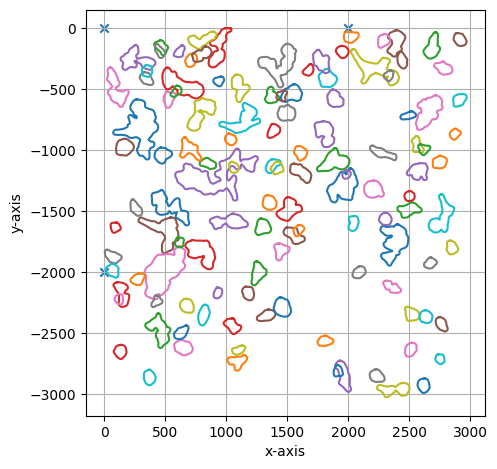

===== Collection Stats =====
Number of shapes: 120
Number of vertices: 16,682
Mean vertices: 139
Min vertices: 62
5% percentile vertices: 75
Median vertices: 103
95% percentile vertices: 314
Max vertices: 705
[0 0]
[      0 -200000]
[200000      0]
[10/02/2025 11:01:08] Saved output at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only_sharded/selection/large_cells_small_cells.xml
[10/02/2025 11:01:08] Cleaned up temporary directory at <TemporaryDirectory '/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./LMDSelection_x859l0ch'>


In [12]:
project.selection_f.segmentation_channel_to_select = "seg_all_cytosol" #update to the correct channel for this notebook with out loading a different config
project.select(cells_to_select, calibration_marker)